# <b>Netflix Content Analyses</b>

Author: Osman Muglu\
Date Created: 29-04-2021\
Data source: https://www.kaggle.com/shivamb/netflix-shows

## Index


<ol>
    <li>Forming the dataframe</li>
    <li>Exploratory data analysis</li>
    <li>Conclusion</li>
</ol>

# <b>1. Forming The Dataframe</b>

### 1.1 Importing The Required Packages

In [468]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In this data set are 12 columns, these are:
<ul>
<li><b>show_id</b> - unique id of each show (not much of a use for us in this notebook), </li>
<li><b>type</b> - The category of a show, can be either a Movie or a TV Show</li>
<li><b>title</b> - Name of the show,</li>
<li><b>director</b> - Name of the director(s) of the show</li>
<li><b>cast</b> - Name of actors and other cast of the show </li>
<li><b>country</b> - Name of countries the show is available to watch on Netflix,</li>
<li><b>date_added</b> - Date when the show was added on Netflix</li>
<li><b>release_year</b> - Release year of the show</li>
<li><b>rating</b> - Show rating on netflix</li>    
<li><b>duration</b> - Time duration of the show</li>
<li><b>listed_in</b> - Genre of the show</li>
<li><b>description</b> - Some text describing the show</li>
</ul>  

### 1.2 Read The CSV File

In [458]:
df= pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [459]:
df.shape

(7787, 12)

# <b>2. Explotary Data Analysis</b>


### 2.1 Dataframe Description

In [460]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [461]:
df.shape

(7787, 12)

In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### 2.2 Netflix Analysis

#### 2.2.1 Movies And TV Shows


In [463]:
netflix_shows=df[df['type']=='TV Show']
netflix_movies=df[df['type']=='Movie']

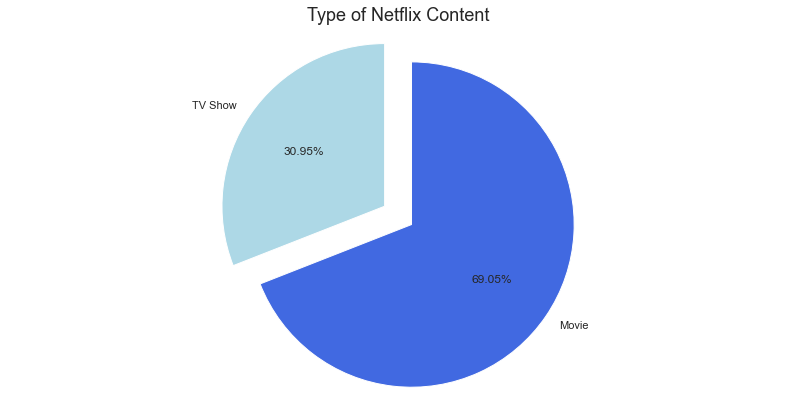

In [464]:
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['lightblue','royalblue'], startangle=90)
plt.title('Type of Netflix Content',size=18)
plt.axis('equal')
plt.show()

In [428]:
df_TV = netflix_shows.groupby('release_year').count()
df_Movie = netflix_movies.groupby('release_year').count()

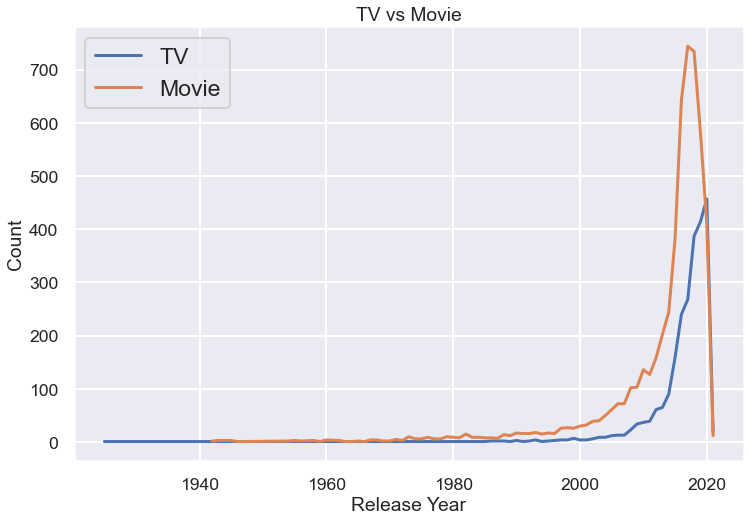

In [469]:
plt.figure(figsize=(12,8))
sns.set_context("poster", font_scale = 0.8)
sns.lineplot(data=df_TV['show_id'], sizes=10)
sns.lineplot(data=df_Movie['show_id'])
plt.ylabel('Count')
plt.xlabel('Release Year')
plt.legend(['TV', 'Movie'], fontsize='large')
plt.title('TV vs Movie')
plt.show()

#### 2.2.2 Top 5 Movie Ratings

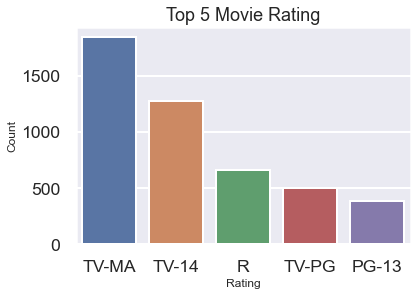

In [473]:
plt.title("Top 5 Movie Rating", size=18)
sns.countplot(x="rating", data=netflix_movies, palette="deep", order=netflix_movies['rating'].value_counts().index[0:5])
plt.ylabel('Count',size=12)
plt.xlabel('Rating',size=12)
plt.show()

Netflix rating description:\
"TV-MA": Mature Audicences only\
"TV-14": Content may be inappropriate for minors younger than 14 years of age\
"R":  Content contains material which may be unsuitable for children under the age of 17\
"TV-PG": Content is intended for children ages 14 and older in the company of an adult\
"PG-13": Content may be inappropriate for ages 12 and under

#### 2.2.3 Analyzing Title Ratings With IMDb Data

<i>Get IMDB data</i>

In [474]:
imdb_ratings=pd.read_csv('IMDb ratings.csv')
imdb_titles=pd.read_csv('IMDb movies.csv')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [432]:
imdb_ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [433]:
imdb_titles.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


<i>Create the dataframe</i>

In [434]:
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.dropna()
ratings.shape

(85852, 4)

<i>Merge IMDB and Netflix dataframes</i>

In [475]:
joint_data=ratings.merge(df,left_on='Title',right_on='title',how='inner')

In [436]:
joint_data.head()

,Title,Release Year,Rating,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Sherlock Holmes,1916,6.4,Mystery,s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...
1,Sherlock Holmes,1922,5.8,"Drama, Mystery",s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...
2,Sherlock Holmes,1932,5.7,Drama,s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...
3,Sherlock Holmes,1937,7.1,"Comedy, Crime, Romance",s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...
4,Sherlock Holmes,2009,7.6,"Action, Adventure, Mystery",s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...


In [437]:
netflix_shows_j=joint_data[joint_data['type']=='TV Show']
netflix_movies_j=joint_data[joint_data['type']=='Movie']

<i>Top 10 rated TV shows on Netflix:</i> 

In [476]:
netflix_shows_j_top10 = netflix_shows_j.sort_values('Rating', ascending=False).head(10)

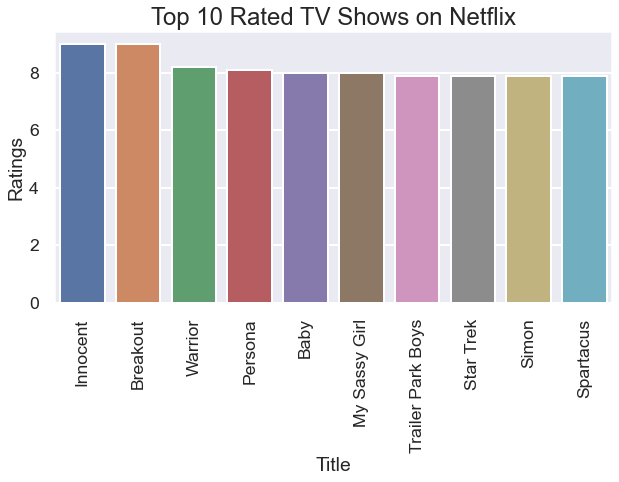

In [481]:
plt.figure(figsize=(10, 5))
sns.barplot(x="title", y="Rating", palette="deep", data = netflix_shows_j_top10
           ).set(xlabel='Title', ylabel='Ratings')
sns.color_palette("viridis", as_cmap=True)
plt.title("Top 10 Rated TV Shows on Netflix", size=24)
plt.xticks(rotation=90)
plt.show()

<i>Top 10 rated movies on Netflix:</i>

In [484]:
netflix_movies_j_top10 = netflix_movies_j.sort_values('Rating', ascending=False).head(10)

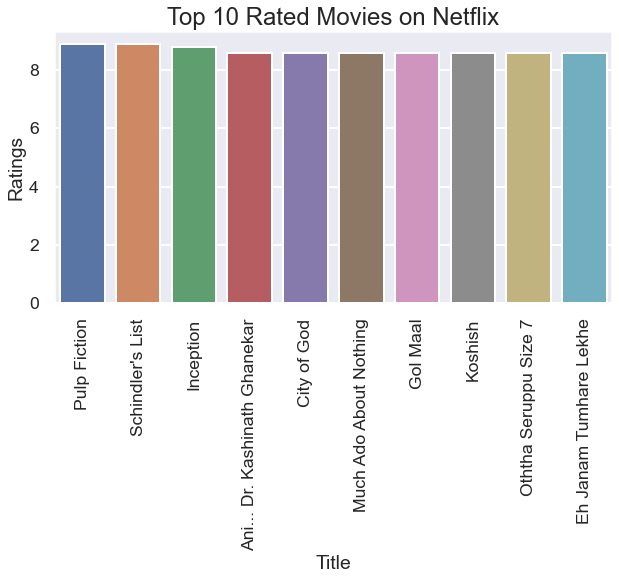

In [483]:
plt.figure(figsize=(10, 5))
sns.barplot(x="title", y="Rating", palette="deep", data = netflix_movies_j_top10
           ).set(xlabel='Title', ylabel='Ratings')
plt.title("Top 10 Rated Movies on Netflix", size=24)
sns.color_palette("viridis", as_cmap=True)
plt.xticks(rotation=90)
plt.show()

<i>Top 10 Countries With The Highest Rated Content</i>

In [440]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
top10_chrc=pd.DataFrame(country_count).head(11).reset_index()
top10_chrc.columns = ['country', 'count']

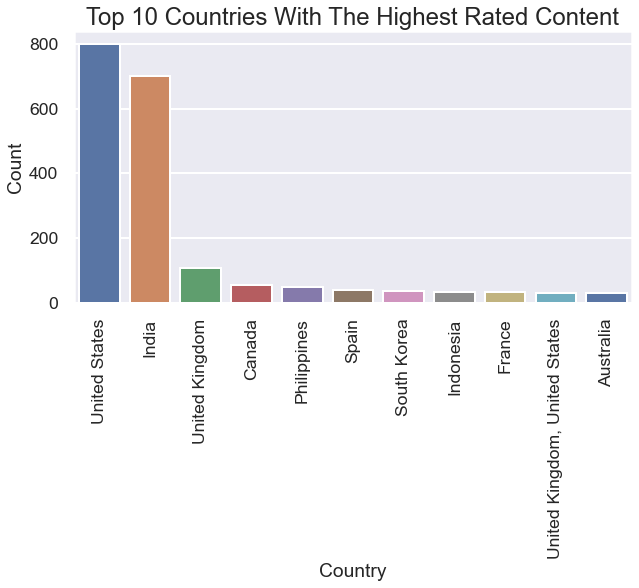

In [485]:
plt.figure(figsize=(10, 5))
sns.barplot(x="country", y="count", palette="deep", data = top10_chrc
           ).set(xlabel='Country', ylabel='Count')
sns.color_palette("viridis", as_cmap=True)
plt.title("Top 10 Countries With The Highest Rated Content", size=24)
plt.xticks(rotation=90
          )
plt.show()

#### 2.2.4 Release Analyses

<i>Yearly Release:</i>

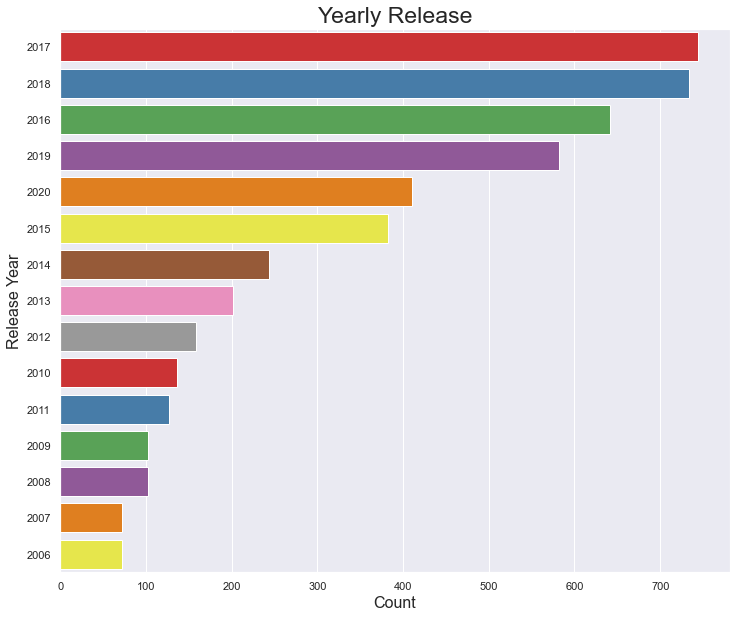

In [489]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set1", order=netflix_movies['release_year'].value_counts().index[0:15])
plt.title("Yearly Release", size=23)
plt.ylabel('Release Year',size=16)
plt.xlabel('Count',size=16)
plt.show()

<i>Monthly release</i>

In [490]:
netflix_date = netflix_overall[['date_added']].replace(np.nan,'Not Added')
netflix_date["release_month"] = netflix_date['date_added'].apply(lambda x: x.lstrip().split(" ")[0])
netflix_date['release_month'].replace('Not', 0,inplace=True)
netflix_date.drop("date_added",axis=1,inplace=True)

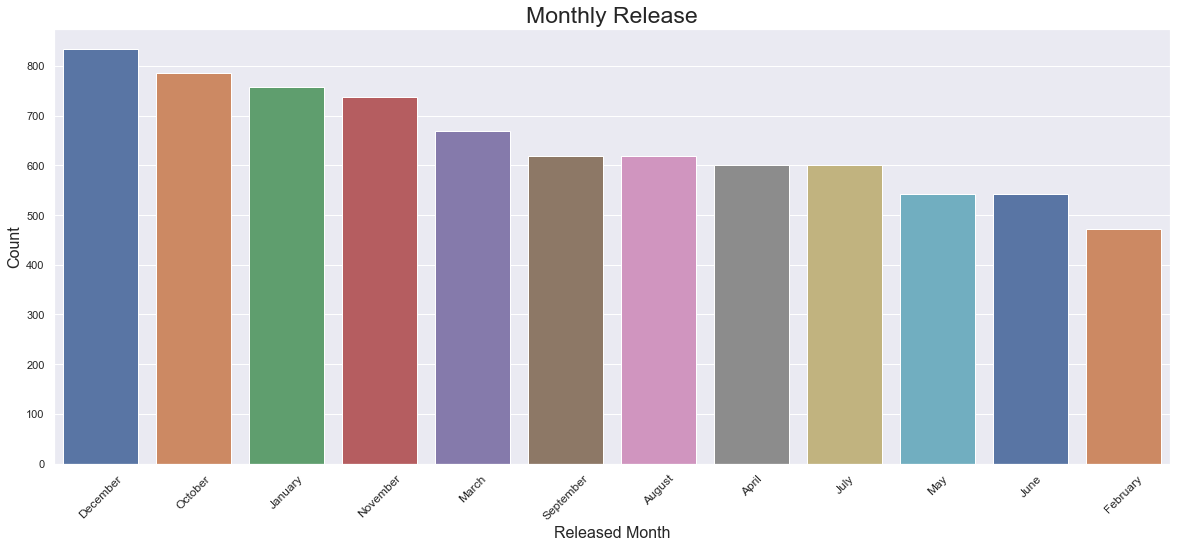

In [492]:
sns.set()
plt.figure(figsize=(20,8))
sns.countplot(x="release_month",data= netflix_date, palette="deep" ,order = netflix_date['release_month'].value_counts().index[0:12])
plt.xticks(rotation=45, size =12)
plt.title("Monthly Release", size=23)
plt.xlabel('Released Month',size=16)
plt.ylabel('Count',size=16)
plt.show()

#### 2.2.6 Top 10 Movie Content Creating Countries

In [493]:
count_type = df.groupby(['country']).count()
most_country = count_type['type'].to_frame().reset_index().sort_values(by='type', ascending=False)[:10]

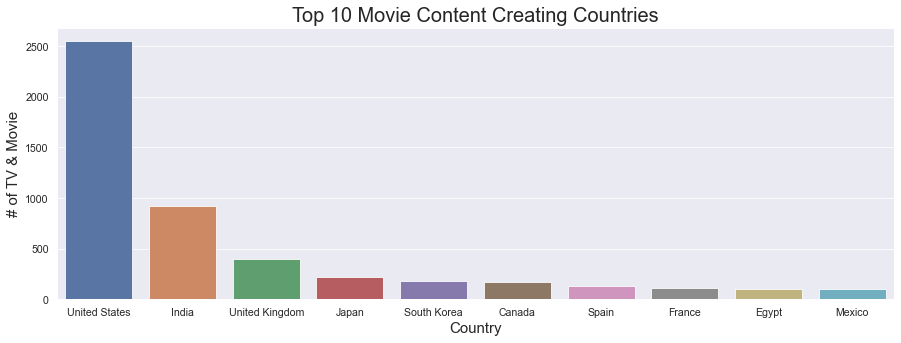

In [496]:
plt.figure(figsize=(15,5))
sns.set_context('paper', font_scale=1.2)
sns.barplot(x='country', y='type', data=most_country)
plt.title("Top 10 Movie Content Creating Countries", size=20)
plt.ylabel('# of TV & Movie', size=15)
plt.xlabel('Country', size=15)
plt.show()

#### 2.2.7 Duration of Movies

In [497]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

<ipython-input-497-738641204206>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-497-738641204206>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int32

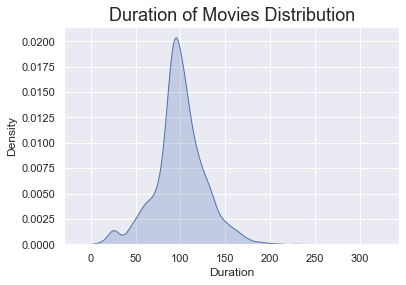

In [498]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)
plt.title("Duration of Movies Distribution", size=18)
plt.ylabel('Density',size=12)
plt.xlabel('Duration',size=12)
plt.show()

#### 2.2.8 Top 10 Genres On Netflix

<i>Top 10 Genres in Movies</i>

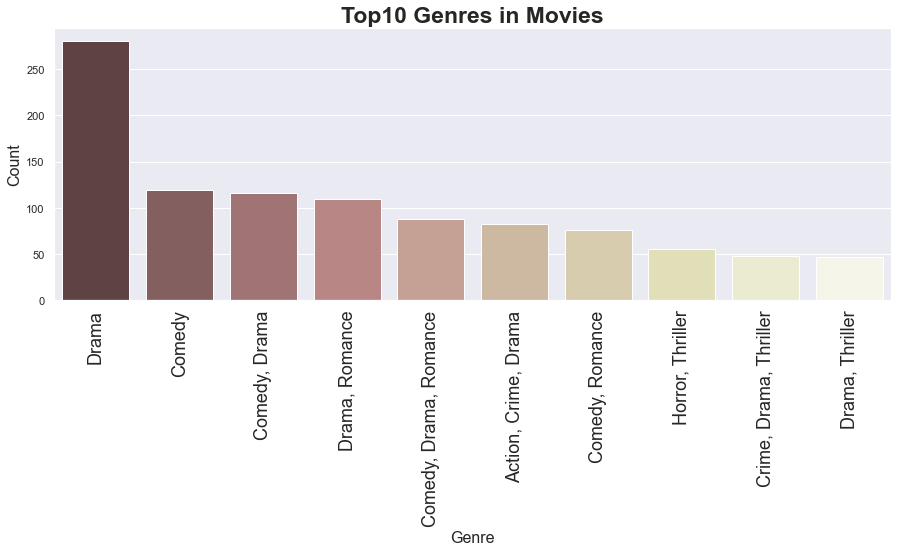

In [500]:
plt.figure(figsize=(15,5))
sns.barplot(x = netflix_movies_j["Genre"].value_counts().head(10).index,
            y = netflix_movies_j["Genre"].value_counts().head(10).values,palette="pink")
plt.xticks(rotation=90, size= 18)
plt.title("Top10 Genres in Movies",fontweight="bold", size= 23)
plt.ylabel('Count',size=16)
plt.xlabel('Genre',size=16)
plt.show()


<i>Top10 genres in TV shows

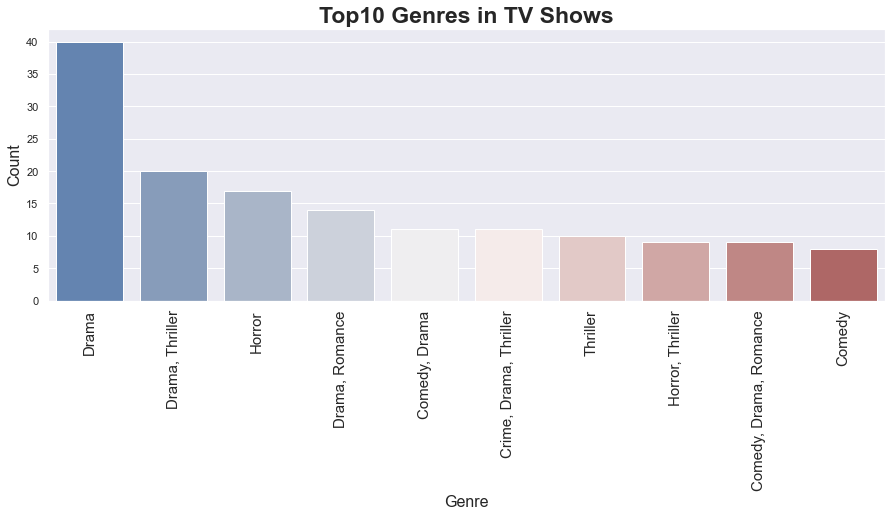

In [501]:
plt.figure(figsize=(15,5))
sns.barplot(x = netflix_shows_j["Genre"].value_counts().head(10).index,
            y = netflix_shows_j["Genre"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=90, size= 15)
plt.title("Top10 Genres in TV Shows",fontweight="bold", size=23)
plt.ylabel('Count',size=16)
plt.xlabel('Genre',size=16)
plt.show()

#### 2.2.9 Top 10 TV Shows With Largest Number Of Seasons

In [452]:
durations= netflix_shows[['title','duration']]
durations['no_of_seasons']=durations['duration'].str.replace(' Season','')
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

<ipython-input-452-ab7574191ead>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-452-ab7574191ead>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-452-ab7574191ead>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [502]:
top=durations[['title','no_of_seasons']]
top10=top.sort_values(by='no_of_seasons', ascending=False).head(10)

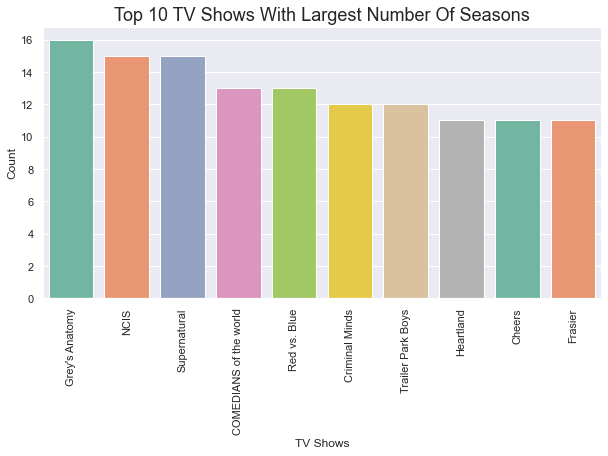

In [503]:
plt.figure(figsize=(10, 5))
sns.barplot(x="title", y="no_of_seasons", palette="Set2", data = top10
           ).set(xlabel='Genre', ylabel='Count')
sns.color_palette("viridis", as_cmap=True)
plt.title("Top 10 TV Shows With Largest Number Of Seasons", size=18)
plt.ylabel('Count',size=12)
plt.xlabel('TV Shows',size=12)
plt.xticks(rotation=90)
plt.show()

#### 2.2.10 Oldest US TV Shows On Netflix

In [455]:
us_series_data=netflix_shows[netflix_shows['country']=='United States']

In [456]:
oldest_us_show=us_series_data.sort_values('release_year').head(1)
oldest_us_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4866,s4867,TV Show,Pioneers of African-American Cinema,"Oscar Micheaux, Spencer Williams, Richard E. N...",NaN,United States,"February 1, 2017",1946,TV-14,1 Season,TV Shows,This newly preserved collection features more ...


#### 2.2.11 Latest Released US TV Show On Netflix

In [457]:
newest_us_series=us_series_data.sort_values(by='release_year', ascending=False).head(1)
newest_us_series

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1222,s1223,TV Show,Carmen Sandiego,NaN,"Gina Rodriguez, Finn Wolfhard, Abby Trott, Mic...",United States,"January 15, 2021",2021,TV-Y7,4 Seasons,"Kids' TV, TV Thrillers","A master thief who uses her skills for good, C..."


# <b>3. Conclusions Netflix Content Analysis</b>

#### 2.2 - Netflix Analysis
<b>2.2.1 - Movies and TV shows:</b> The data shows us that there are more movies than TV shows on Netflix. The content on Netflix consists of 69.05% movies and 30.95% of TV shows. What the data also shows us that, Netflix has more focus on releasing movies rather than TV shows. 

<b>2.2.2 - Top 5 Movie Ratings:</b> The data shows us the following top 5 assigned movie ratings: (1) TV-MA, (2) TV-14, (3) R, (4) TV-PG, and (5) PG-13.

<b>2.2.3 - Analyzing Title Rating With IMDb Data:</b>\
<i>Top 10 rated TV Shows On Netflix Are:</i> \
(1) Innocent\
(2) Breakout\
(3) Warrior\
(4) Perona\
(5) Baby\
(6) My Sassy Girl\
(7) Trailer Park Boys\
(8) Star Trek\
(9) Simon\
(10) Spartacus

<i>Top 10 Rated Movies On Netflix:</i>\
(1) Pulp Fiction\
(2) Schindler’s List\
(3) Inception\
(4) Ani … Dr. Kashinath Ghanekar\
(5) City of God\
(6) Much Ado About nothing\
(7) Gol Maal\
(8) Koshinish\
(9) Ortha Senupu sSze 7\
(10) Eh Janam Turhane Lekhe

<i>Top 10 Countries With The Highest Rated Content</i>\
(1) United States\
(2) India\
(3) United Kingdom\
(4) Canada\
(5) Philippines\
(6) Spain\
(7) South Korea\
(8) Indonesia\
(9) France\
(10) Australia

<b>2.2.4 - Release Analyses: </b>

<i>Yearly Release:</i> When we look at the data can we see that 2017 was the year with the most releases. Also, the data also shows that 2006 has the lowest number of releases. 

<i>Monthly Release:</i>  Looking at the data we can see that the most content is always released in the month of December. 
 
<b>2.2.6 - Top 10 Content Creating Countries:</b>\
(1) United States\
(2) India\
(3) United Kingdom\
(4) Japan\
(5) South Korea\
(6) Canada\
(7) Spain\
(8) France\
(9) Egypt\
(10) Mexico
    



<b>2.2.7 - Duration Of Movies:</b> The data shows us that most of the movies have a duration between 80 and 120 minutes. 

<b>2.2.8 - Top 10 Genres On With Highest Amount Of Content On Netflix (IMDB):</b> The data shows us that drama and comedy are the most common genres with the movies. However, when it comes to the TV shows the drama, thriller and horror genres are the most common. 

<b>2.2.9 - Top 10 TV Shows With The Largest Number Of Seasons: The data shows us the following:</b>\
(1) Grey’s Autonomy\
(2) NCIS\
(3) Supernatural\
(4) COMEDIANS of the world\
(5) Red Vs. Blue\
(6) Criminal Minds\
(7) Trailer Park Boys\
(8) Haartland\
(9) Cheers\
(10) Frassier

<b>2.2.10 - Oldest US TV show On Netflix:</b> The oldest TV US show on Netflix is Pioneers of African-American Cinema that was released in 1946.

<b>2.2.11 - Latest Released US TV Show On Netflix:</b> The newest US TV show on Netflix is Carmen Sandiego that was released in January. 



